In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from matplotlib.colors import LinearSegmentedColormap

In [14]:
boroughs = gpd.read_file('../data/Borough Boundaries.geojson')
boroughs.head(20)

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5,Staten Island,1623620725.05,325917.35395,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,1,Manhattan,636520502.758,357713.308162,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
2,2,Bronx,1187174772.5,463180.579449,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
3,3,Brooklyn,1934138215.76,728146.574928,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4,Queens,3041418506.64,888199.731385,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


<Axes: >

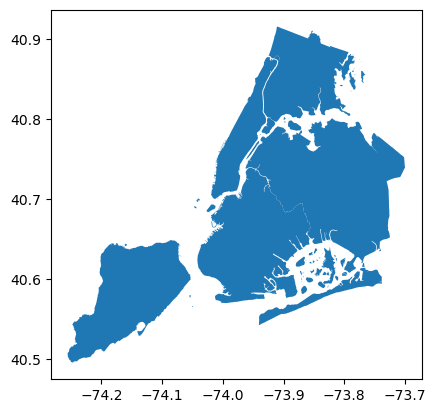

In [15]:
boroughs.plot()

In [16]:
annual_report = pd.read_csv('../data/DOHMH_HIV_AIDS_Annual_Report_20240129.csv')
borough_annual_report = annual_report[(annual_report['Borough'] != 'All') & \
                                  (annual_report['Year'] == 2021) & \
                                  (annual_report['Race'] == 'All') & \
                                  (annual_report['Gender'] == 'All') & \
                                  (annual_report['Age'] == 'All') & \
                                  (annual_report['UHF'] == 'All')]
borough_annual_report

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
26849,2021,Bronx,All,All,All,All,366.0,33.9,70.0,0.84,295.0,27.3,2.2,0.78,623,11.5,0.0,0.0
27714,2021,Brooklyn,All,All,All,All,411.0,20.1,86.0,0.81,246.0,12.0,1.0,0.83,445,8.8,0.0,0.0
29009,2021,Manhattan,All,All,All,All,306.0,22.9,57.0,0.81,192.0,14.4,1.5,0.85,381,6.6,0.0,0.0
30199,2021,Queens,All,All,All,All,290.0,15.4,62.0,0.82,179.0,9.5,0.7,0.87,156,5.4,0.0,0.0
31385,2021,Staten Island,All,All,All,All,40.0,10.3,10.0,0.77,29.0,7.5,0.5,0.82,40,9.7,0.0,0.0


In [17]:
bor_p = pd.merge(boroughs, borough_annual_report, left_on='boro_name', right_on='Borough')
bor_p

,boro_code,boro_name,shape_area,shape_leng,geometry,Year,Borough,UHF,Gender,Age,...,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,5,Staten Island,1623620725.05,325917.35395,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",2021,Staten Island,All,All,All,...,10.0,0.77,29.0,7.5,0.5,0.82,40,9.7,0.0,0.0
1,1,Manhattan,636520502.758,357713.308162,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",2021,Manhattan,All,All,All,...,57.0,0.81,192.0,14.4,1.5,0.85,381,6.6,0.0,0.0
2,2,Bronx,1187174772.5,463180.579449,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",2021,Bronx,All,All,All,...,70.0,0.84,295.0,27.3,2.2,0.78,623,11.5,0.0,0.0
3,3,Brooklyn,1934138215.76,728146.574928,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",2021,Brooklyn,All,All,All,...,86.0,0.81,246.0,12.0,1.0,0.83,445,8.8,0.0,0.0
4,4,Queens,3041418506.64,888199.731385,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",2021,Queens,All,All,All,...,62.0,0.82,179.0,9.5,0.7,0.87,156,5.4,0.0,0.0


In [18]:
colors = [(0, '#EA99A1'), (0.5, '#DC5663'), (1, '#A82331')]
red_cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)

In [19]:
bor_p['coords'] = bor_p['geometry'].apply(lambda x: x.representative_point().coords[:])
bor_p['coords'] = [coords[0] for coords in bor_p['coords']]

c:\Users\koste\anaconda3\envs\geospatial\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


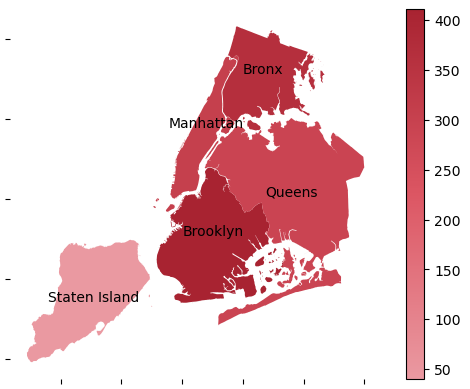

In [20]:
ax = bor_p.plot(column = 'HIV diagnoses', legend=True, cmap=red_cmap)
for idx, row in bor_p.iterrows():
    plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center')
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

In [21]:
annual_report = pd.read_csv('../data/DOHMH_HIV_AIDS_Annual_Report_20240129.csv')
uhf_annual_report = annual_report[(annual_report['Borough'] != 'All') & \
                                  (annual_report['Year'] == 2021) & \
                                  (annual_report['Race'] == 'All') & \
                                  (annual_report['Gender'] == 'All') & \
                                  (annual_report['Age'] == 'All') & \
                                  (annual_report['UHF'] != 'All')]
uhf_annual_report.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
26957,2021,Bronx,Crotona - Tremont,All,All,All,75.0,48.8,12.0,0.79,74.0,48.2,3.2,0.76,149,12.7,0.0,0.0
27065,2021,Bronx,Fordham - Bronx Park,All,All,All,70.0,35.3,16.0,0.86,68.0,34.3,2.3,0.79,109,11.0,0.0,0.0
27173,2021,Bronx,High Bridge - Morrisania,All,All,All,65.0,41.2,16.0,0.88,45.0,28.5,3.0,0.77,147,13.1,0.0,0.0
27281,2021,Bronx,Hunts Point - Mott Haven,All,All,All,NaN,NaN,4.0,0.72,35.0,34.6,3.0,0.75,84,15.2,0.0,0.0
27389,2021,Bronx,Kingsbridge - Riverdale,All,All,All,12.0,16.1,1.0,0.92,7.0,9.4,0.8,0.80,19,9.6,0.0,0.0


In [22]:
uhf_codes = pd.read_csv('../data/uhf_codes.csv')
uhf_codes = uhf_codes[['UHF_Code', 'Neighborhood']]
uhf_codes.head()

,UHF_Code,Neighborhood
0,101,Kingsbridge - Riverdale
1,102,Northeast Bronx
2,103,Fordham - Bronx Park
3,104,Pelham - Throgs Neck
4,105,Crotona - Tremont


In [23]:
uhf_annual_report_merged = pd.merge(left=uhf_annual_report, right=uhf_codes, left_on='UHF', right_on='Neighborhood', how='left')
uhf_annual_report_merged.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate,UHF_Code,Neighborhood
0,2021,Bronx,Crotona - Tremont,All,All,All,75.0,48.8,12.0,0.79,74.0,48.2,3.2,0.76,149,12.7,0.0,0.0,105,Crotona - Tremont
1,2021,Bronx,Fordham - Bronx Park,All,All,All,70.0,35.3,16.0,0.86,68.0,34.3,2.3,0.79,109,11.0,0.0,0.0,103,Fordham - Bronx Park
2,2021,Bronx,High Bridge - Morrisania,All,All,All,65.0,41.2,16.0,0.88,45.0,28.5,3.0,0.77,147,13.1,0.0,0.0,106,High Bridge - Morrisania
3,2021,Bronx,Hunts Point - Mott Haven,All,All,All,NaN,NaN,4.0,0.72,35.0,34.6,3.0,0.75,84,15.2,0.0,0.0,107,Hunts Point - Mott Haven
4,2021,Bronx,Kingsbridge - Riverdale,All,All,All,12.0,16.1,1.0,0.92,7.0,9.4,0.8,0.80,19,9.6,0.0,0.0,101,Kingsbridge - Riverdale


In [24]:
neighborhoods = gpd.read_file('../data/uhf42.topo.json')
neighborhoods['id'] = neighborhoods['id'].astype('int64')
neighborhoods = neighborhoods.iloc[0:-1]
neighborhoods

,id,GEOCODE,GEONAME,BOROUGH,geometry
0,101,101,Kingsbridge - Riverdale,Bronx,"POLYGON ((-73.87792 40.90554, -73.88011 40.895..."
1,102,102,Northeast Bronx,Bronx,"POLYGON ((-73.81498 40.88899, -73.81535 40.886..."
2,103,103,Fordham - Bronx Park,Bronx,"POLYGON ((-73.88011 40.89520, -73.87048 40.896..."
3,104,104,Pelham - Throgs Neck,Bronx,"MULTIPOLYGON (((-73.88368 40.82158, -73.88470 ..."
4,105,105,Crotona - Tremont,Bronx,"POLYGON ((-73.91292 40.86196, -73.91446 40.859..."
5,106,106,High Bridge - Morrisania,Bronx,"POLYGON ((-73.92751 40.84647, -73.92240 40.845..."
6,107,107,Hunts Point - Mott Haven,Bronx,"POLYGON ((-73.89630 40.83358, -73.89302 40.835..."
7,201,201,Greenpoint,Brooklyn,"POLYGON ((-73.92401 40.71401, -73.92634 40.714..."
8,202,202,Downtown - Heights - Slope,Brooklyn,"POLYGON ((-73.96908 40.70703, -73.96725 40.704..."
9,203,203,Bedford Stuyvesant - Crown Heights,Brooklyn,"POLYGON ((-73.91606 40.68604, -73.90352 40.678..."


In [25]:
neighborhoods_hiv = pd.merge(left=uhf_annual_report_merged, right=neighborhoods, left_on='UHF_Code', right_on='id', how='left')

In [26]:
neighborhoods_hiv = gpd.GeoDataFrame(neighborhoods_hiv)
neighborhoods_hiv.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Year                              42 non-null     int64   
 1   Borough                           42 non-null     object  
 2   UHF                               42 non-null     object  
 3   Gender                            42 non-null     object  
 4   Age                               42 non-null     object  
 5   Race                              42 non-null     object  
 6   HIV diagnoses                     41 non-null     float64 
 7   HIV diagnosis rate                41 non-null     float64 
 8   Concurrent diagnoses              42 non-null     float64 
 9   % linked to care within 3 months  41 non-null     float64 
 10  AIDS diagnoses                    42 non-null     float64 
 11  AIDS diagnosis rate               42 non-null     fl

In [27]:
neighborhoods_hiv['coords'] = neighborhoods_hiv['geometry'].apply(lambda x: x.representative_point().coords[:])
neighborhoods_hiv['coords'] = [coords[0] for coords in neighborhoods_hiv['coords']]

c:\Users\koste\anaconda3\envs\geospatial\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


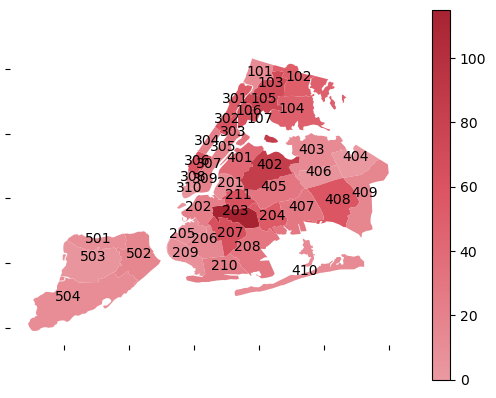

In [28]:
#neighborhoods_hiv.plot()
ax = neighborhoods_hiv.plot(column = 'HIV diagnoses', legend=True, cmap=red_cmap)
for idx, row in neighborhoods_hiv.iterrows():
    plt.annotate(text=row['UHF_Code'], xy=row['coords'], horizontalalignment='center')
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

In [29]:
# uhf_annual_report_merged2 = pd.merge(left=uhf_annual_report, right=uhf42, left_on='UHF', right_on='Neighborhood', how='left')
# uhf_annual_report_merged2.head()

In [34]:
# mapping testing locations
testing_locations = pd.read_csv('../data/HIV_Testing_Locations_20240129.csv')
testing_locations['Borough'] = testing_locations['Borough'].str.lower().str.title()
testing_locations = testing_locations[['Borough', 'Address']].groupby(by='Borough').count().reset_index()
testing_locations= testing_locations.rename(columns={'Address': 'test_location_count'})
testing_locations.head(10)

,Borough,test_location_count
0,Bronx,143
1,Brooklyn,136
2,Manhattan,156
3,New York,1
4,Queens,58
5,Staten Island,27


In [35]:
map_by_borough_testing = pd.merge(bor_p, testing_locations, how='left', left_on='boro_name', right_on='Borough')
map_by_borough_testing.head()

,boro_code,boro_name,shape_area,shape_leng,geometry,Year,Borough_x,UHF,Gender,Age,...,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate,coords,Borough_y,test_location_count
0,5,Staten Island,1623620725.05,325917.35395,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",2021,Staten Island,All,All,All,...,7.5,0.5,0.82,40,9.7,0.0,0.0,"(-74.1456424883759, 40.57249073815982)",Staten Island,27
1,1,Manhattan,636520502.758,357713.308162,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",2021,Manhattan,All,All,All,...,14.4,1.5,0.85,381,6.6,0.0,0.0,"(-73.9602511108825, 40.78870866639667)",Manhattan,156
2,2,Bronx,1187174772.5,463180.579449,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",2021,Bronx,All,All,All,...,27.3,2.2,0.78,623,11.5,0.0,0.0,"(-73.86633177711762, 40.85607244168192)",Bronx,143
3,3,Brooklyn,1934138215.76,728146.574928,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",2021,Brooklyn,All,All,All,...,12.0,1.0,0.83,445,8.8,0.0,0.0,"(-73.94864366802588, 40.65433337705038)",Brooklyn,136
4,4,Queens,3041418506.64,888199.731385,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",2021,Queens,All,All,All,...,9.5,0.7,0.87,156,5.4,0.0,0.0,"(-73.81987112279087, 40.704093029191846)",Queens,58


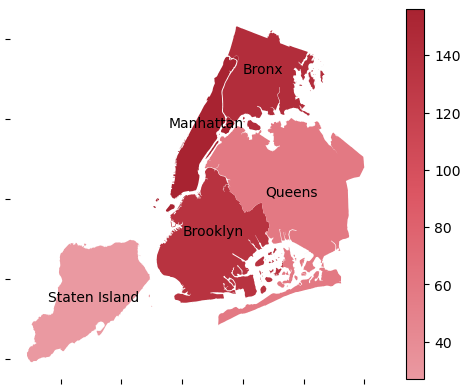

In [36]:
ax = map_by_borough_testing.plot(column = 'test_location_count', legend=True, cmap=red_cmap)
for idx, row in bor_p.iterrows():
    plt.annotate(text=row['boro_name'], xy=row['coords'], horizontalalignment='center')
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

Maps for condom distribution locations.

In [38]:
active_condom_distrib = pd.read_csv('../data/clean_active_cond_dist.csv')
active_condom_distrib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    593 non-null    int64  
 1   FacilityName  593 non-null    object 
 2   Address       593 non-null    object 
 3   Borough       593 non-null    object 
 4   Zipcode       593 non-null    int64  
 5   Latitude      593 non-null    float64
 6   Longitude     593 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 32.6+ KB


In [39]:
ac_geo = gpd.GeoDataFrame(active_condom_distrib,
                        crs = map_by_borough_testing.crs,
                        geometry=gpd.points_from_xy(active_condom_distrib.Longitude,
                            active_condom_distrib.Latitude))

In [40]:
type(ac_geo)

geopandas.geodataframe.GeoDataFrame

In [41]:
ac_map = gpd.sjoin(ac_geo, map_by_borough_testing, predicate = 'within')

In [42]:
ac_map.head()

,Unnamed: 0,FacilityName,Address,Borough,Zipcode,Latitude,Longitude,geometry,index_right,boro_code,...,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate,coords,Borough_y,test_location_count
0,0,CLASSIC FADEZ,"1455B ST. JOHNS PLACE, BROOKLYN NY 11213",Brooklyn,11213,40.670541,-73.930199,POINT (-73.93020 40.67054),3,3,...,12.0,1.0,0.83,445,8.8,0.0,0.0,"(-73.94864366802588, 40.65433337705038)",Brooklyn,136
3,3,3 Dollar Bill,250 Meserole Street,Brooklyn,11206,40.708520,-73.938441,POINT (-73.93844 40.70852),3,3,...,12.0,1.0,0.83,445,8.8,0.0,0.0,"(-73.94864366802588, 40.65433337705038)",Brooklyn,136
7,7,The Brooklyn Sweet Shop,366 Myrtle Avenue,Brooklyn,11205,40.693184,-73.971562,POINT (-73.97156 40.69318),3,3,...,12.0,1.0,0.83,445,8.8,0.0,0.0,"(-73.94864366802588, 40.65433337705038)",Brooklyn,136
17,17,South Island Medical Associates,8918 Avenue L,Brooklyn,11236,40.634942,-73.901046,POINT (-73.90105 40.63494),3,3,...,12.0,1.0,0.83,445,8.8,0.0,0.0,"(-73.94864366802588, 40.65433337705038)",Brooklyn,136
19,19,Caramel Clothing store,1598 Pitkin Ave,Brooklyn,11212,40.669131,-73.914365,POINT (-73.91436 40.66913),3,3,...,12.0,1.0,0.83,445,8.8,0.0,0.0,"(-73.94864366802588, 40.65433337705038)",Brooklyn,136


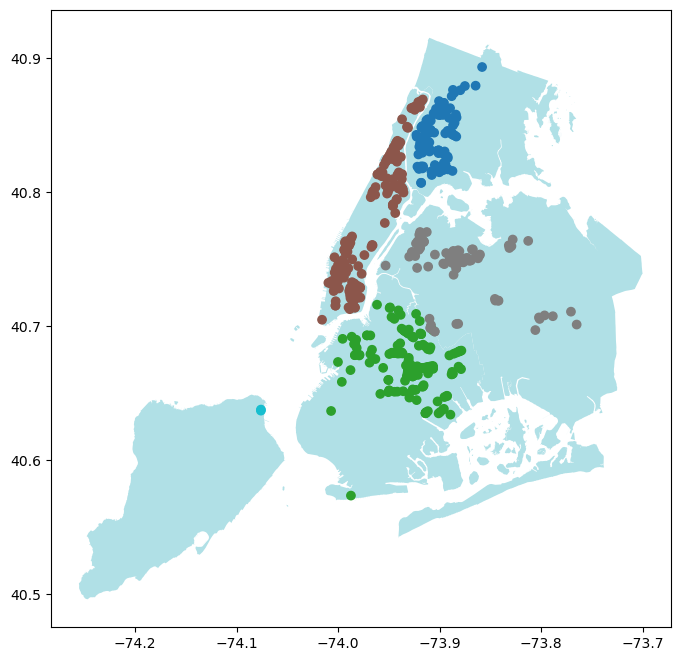

In [44]:
ax = map_by_borough_testing.plot(figsize = (8, 10), color = 'powderblue')
ac_map.plot( ax = ax, column = 'Borough')
plt.show()